Final Project:
Goes through the sep tutorial

In [91]:
import numpy as np
import sep

In [92]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [93]:
# read image into standard 2d numpy array
data = fits.open("/Users/vanessabirrueta/Downloads/image.fits")[0].data
#data = data.byteswap(inplace=True).newbyteorder()

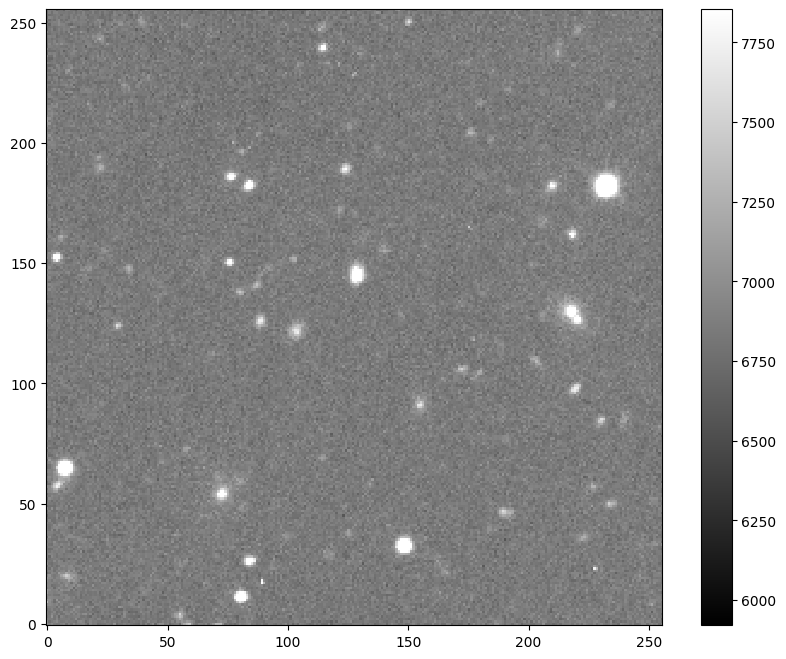

In [94]:
# show image
m,s = np.mean(data), np.std(data)
plt.imshow(data, interpolation = 'nearest', cmap = 'gray', vmin = m - s, vmax = m + s, origin = 'lower')
plt.colorbar();
plt.savefig('finalproj1.png')

Background Subtraction

In [95]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [96]:
# get a "global" mean and noise of the image background
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [97]:
# Evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

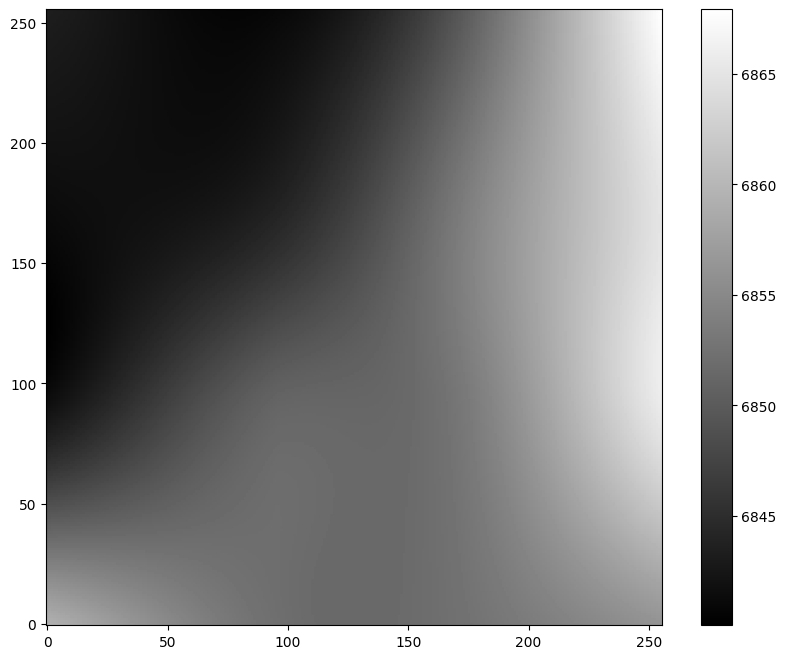

In [98]:
# Show the background
plt.imshow(bkg_image, interpolation = 'nearest', cmap = 'gray', origin = 'lower')
plt.colorbar()
plt.savefig('finalproj2.png')

In [99]:
# evaluate the background noide as 2d array, same size as original image
bkg_rms = bkg.rms()

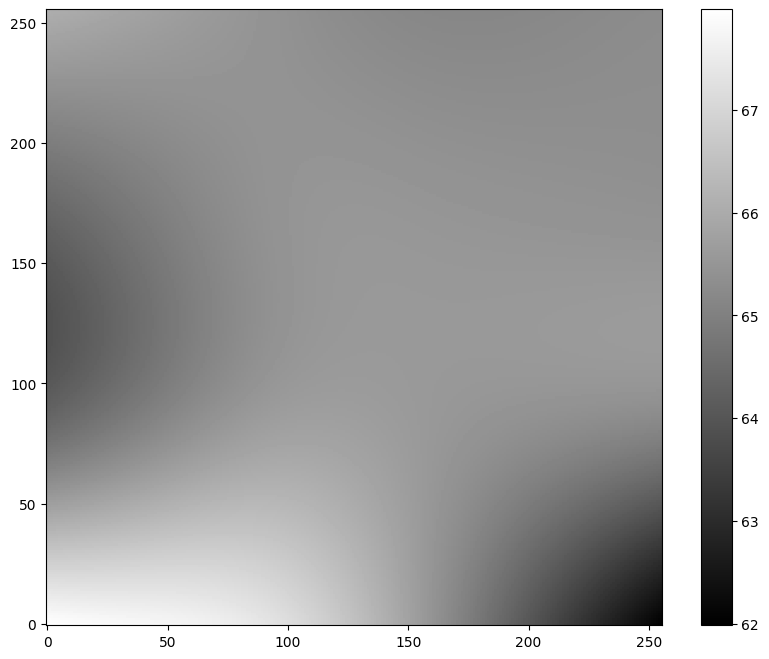

In [100]:
# show the background noise 
plt.imshow(bkg_rms, interpolation = 'nearest', cmap = 'gray', origin = 'lower')
plt.colorbar()
plt.savefig('finalproj3.png')

In [101]:
# subtract the background
data_sub = data - bkg

Object Detection

In [102]:
# object detection 
objects = sep.extract(data_sub, 1.5, err = bkg.globalrms)

In [103]:
# How many objects were detected
len(objects)

68

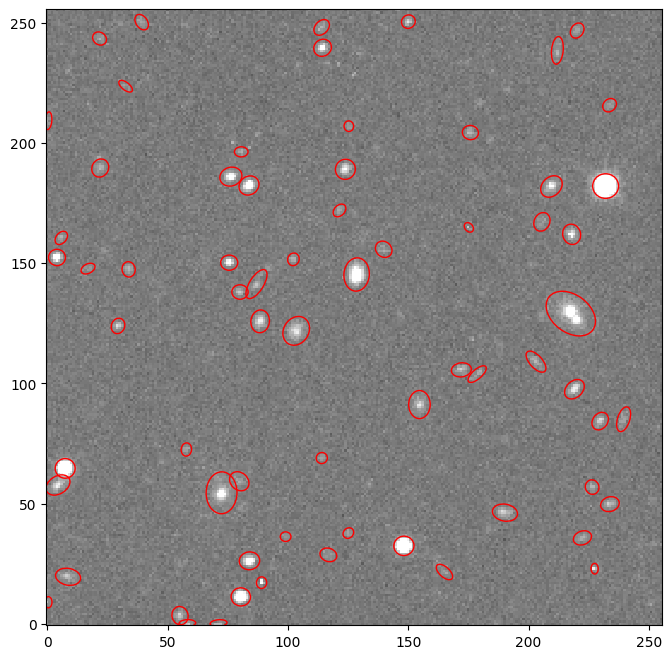

In [104]:

from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('finalproj4.png')

In [105]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

Aperture Photometry

In [106]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err = bkg.globalrms, gain = 1.0)

In [107]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))


object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
